<a href="https://colab.research.google.com/github/kaojan05/AI/blob/main/keras_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=60, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=60, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 60)          │           4,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 120)           │         180,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 120)           │         360,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 120)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           4,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 639,670 (2.44 MB)

 Trainable params: 639,670 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
cifar10=keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original=train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-10-84413b7363d5>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(category[int(train_label_original[0])])


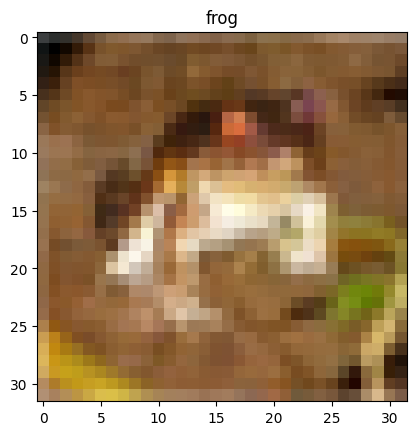

[6]


In [10]:
import matplotlib.pyplot as plt
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_data[0])
plt.title(category[int(train_label_original[0])])
plt.show()
print(train_label_original[0])

In [18]:
train_history=model.fit(train_data,train_label,epochs=3,batch_size=120)

Epoch 1/3
417/417 ━━━━━━━━━━━━━━━━━━━━ 635s 2s/step - accuracy: 0.3054 - loss: 1.9793
Epoch 2/3
417/417 ━━━━━━━━━━━━━━━━━━━━ 631s 2s/step - accuracy: 0.4257 - loss: 1.6761
Epoch 3/3
417/417 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.5094 - loss: 1.4268


In [19]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.5188 - loss: 1.4666
0.5148000121116638


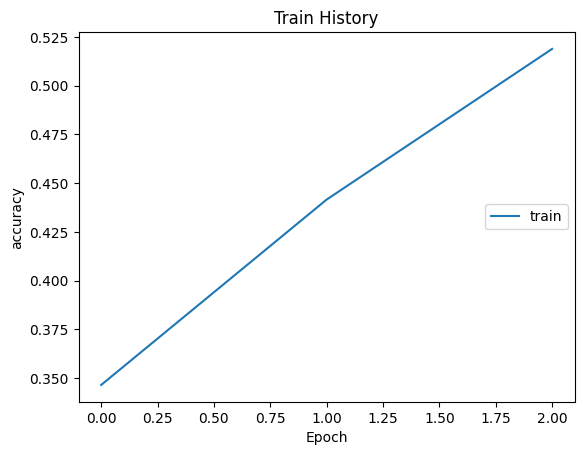

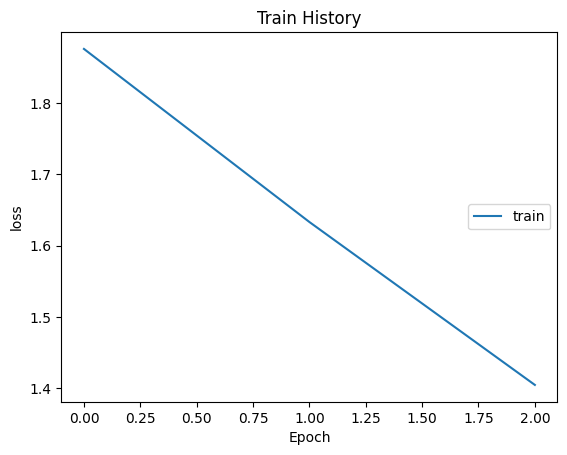

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')